In [3]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

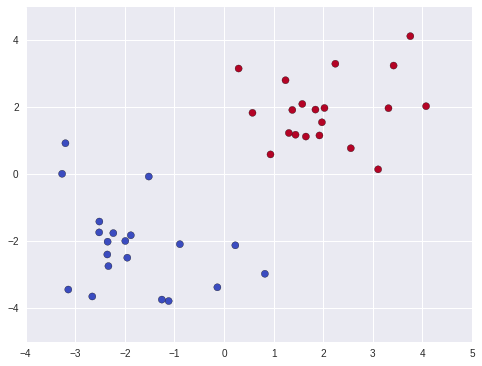

In [20]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [21]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=100000)  # when the data is seperable, we can set C as big as we can.
clf.fit(X, Y)

w = clf.coef_[0] #get the coefficents

a = -w[0] / w[1] #slope. We devide w[1] here for a better vision only (w[1] is the coefficient for y). The minus sign appears since we move the x to the right side.
print("The hyperplane is: y={:.3}*x{:.3}".format(a,- (clf.intercept_[0]) / w[1]))# minus sign,and devide w[1]
#it is ok if you have a line like this one:
print("Alternative answer:{:.3}x+{:.3}y+{:.3}=0".format(w[0],w[1],clf.intercept_[0]))

The hyperplane is: y=-1.18*x-0.0767
Alternative answer:0.663x+0.564y+0.0432=0


(b).

In [22]:
# Margin: (We need support vectors to get the margin)
#down: Use the same slop, but one support vector on it.
b = clf.support_vectors_[0]
print ("the downside margin is: y={:.3}*x{:.3}".format(a,(b[1] - a* b[0])))

#upside: (Same)
b = clf.support_vectors_[-1]
print ("the upside margin is: y={:.3}*x+{:.3}".format(a,(b[1] - a* b[0])))

the downside margin is: y=-1.18*x-1.85
the upside margin is: y=-1.18*x+1.7


(c).

In [23]:
#Support vectors:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

2.Plot

In [26]:
#Change the form of X to numpy array
X=np.array(X)

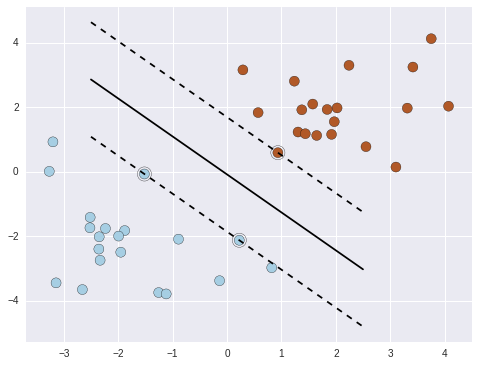

In [27]:
from sklearn import svm

#Just repeat the steps from part one and plot it.

w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


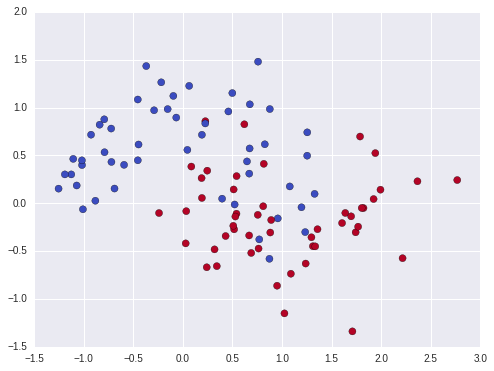

In [28]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

In [32]:
#Train the SVM model with soft margin and set C=0.01 on our training set:
clf = svm.SVC(kernel='linear',C=0.01) 
clf.fit(X_train, Y_train)

#Report IS and OS result:
correct_IS=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "we successfully(IS) predict the {:.4} percent of data".format((correct_IS)*100)
print "we successfully(OS) predict the {:.4} percent of data".format((correct_OS)*100)

we successfully(IS) predict the 55.22 percent of data
we successfully(OS) predict the 39.39 percent of data


(2)

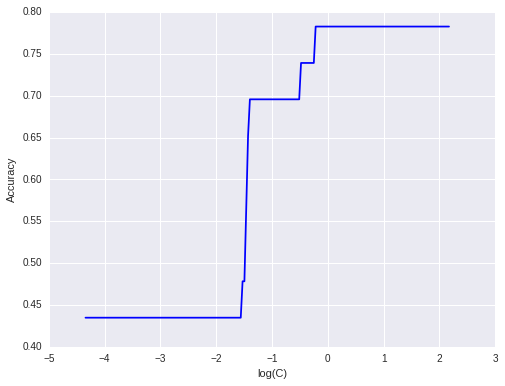

The optimal C we found is:148.413159103 and the corresponding accuracy is:0.782608695652


In [35]:
#Let's do cross validation for choosing C since we see the result is not
#very good.
import pylab
import math
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, which 
#means we do not tolerate any mistakes. So, we cannot make a very big C if our data is not
#seperable or your computer will be dead.
C=[math.exp(i) for i in np.linspace(-10,5,200)]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])-1 # Let's take the biggest
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C] #for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.


#### (For this question people could have different C. Any C is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

(3)

In [36]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear model".format((correct)*100)

we successfully(OS) predict the 81.8181818182 percent of data by using linear model


#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


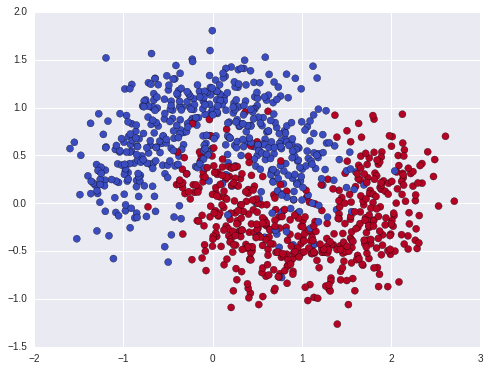

In [37]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

In [38]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

#Report IS and OS result:
correct_IS=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "we successfully(IS) predict the {:.4} percent of data".format((correct_IS)*100)
print "we successfully(OS) predict the {:.4} percent of data".format((correct_OS)*100)

we successfully(IS) predict the 81.34 percent of data
we successfully(OS) predict the 82.73 percent of data


(2)
a.

for degree=1:
When C_opt=1.36555069788, we get max accuracy: 0.837837837838


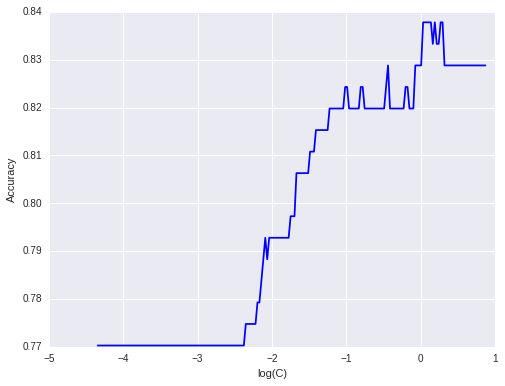

for degree=2:
When C_opt=3.27372882349, we get max accuracy: 0.743243243243


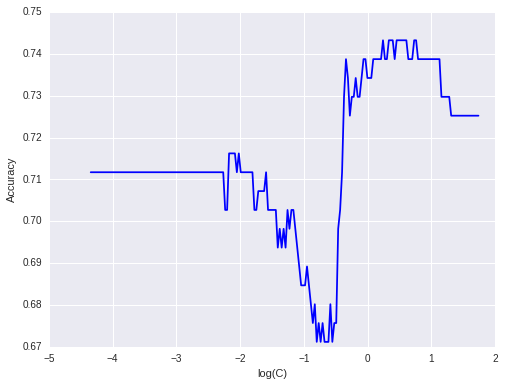

for degree=3:
When C_opt=46.0232051301, we get max accuracy: 0.873873873874


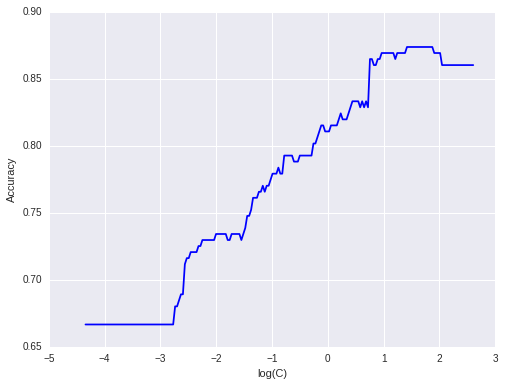

for degree=4:
When C_opt=1.36555069788, we get max accuracy: 0.720720720721


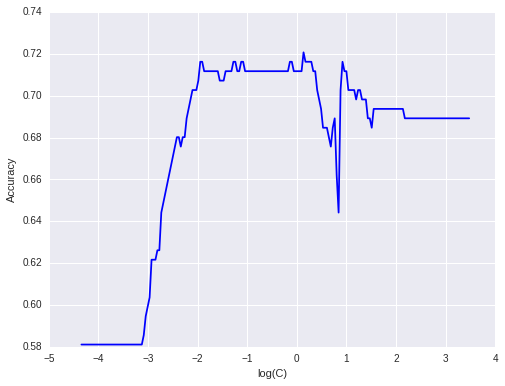

In [40]:

for degree in range(1,5):
    print("for degree={}:".format(degree))
    #When degree increases, we could have a bigger C.
    
    C = np.linspace(-10,2*degree,200)
    C=[math.exp(i) for i in C]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(right)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 #Here I used middle C instead of the biggest we used for class
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

    print("When C_opt={}, we get max accuracy: {}".format(C_opt,temp.iloc[:,1].max()))
    
    C=[math.log(y,10) for y in C]# for a better graph
    pylab.plot(C,OS_validation,'b',)
    pylab.legend(loc='upper right')
    pylab.ylabel('Accuracy')
    pylab.xlabel('log(C)')
    pylab.show()

My optimal degree is 3, and I choose C=82

### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could meet problem(might not, no garuantee). So you might have your own way to pick optimal C, but you should have a similar OS result in next question. 

(3)

In [43]:
#Reset the arguments in model,
clf = svm.SVC(kernel='poly',C=82,degree=3)
clf.fit(X_train, Y_train)

#Report IS and OS result:
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {:.4} percent of data".format((correct_OS)*100)

we successfully(OS) predict the 87.58 percent of data


Good luck on mid term exam!